In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter as count
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
test = pd.read_csv('test_final.csv.zip')
train = pd.read_csv('train_final.csv.zip')

In [ ]:
train.info()
test_size = 0.2

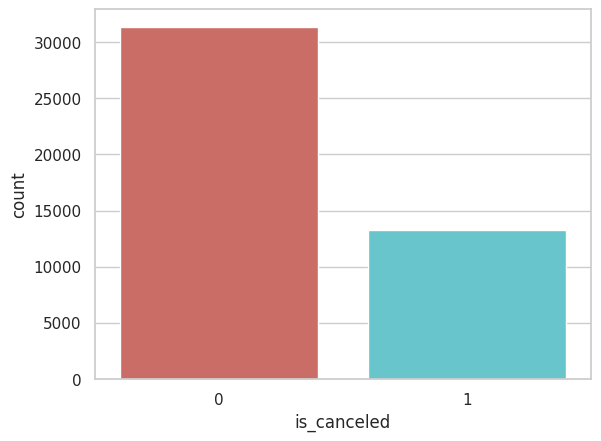

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(train['is_canceled'])
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

In [ ]:
count(train['is_canceled'])

Counter({0: 31354, 1: 13284})

In [ ]:
def filter_str(df):
    data = df.iloc[0, :]
    index = []

    for i, j in zip(data.index, data.values):
        if type(j) != type('a'):
            index.append(i)
    return index

def filter_not_str(df):
    data = df.iloc[0, :]
    index = []

    for i, j in zip(data.index, data.values):
        if type(j) == type('a'):
            index.append(i)
    return index

In [ ]:
df_train = train[filter_not_str(train)]
filter_not_str(train)

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
# работает так себе
labelencoder = LabelEncoder()
for i in filter_not_str(train):
    train.loc[:, i] = labelencoder.fit_transform(train.loc[:, i])
# train

<ipython-input-87-5ea7b5060f1b>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, i] = labelencoder.fit_transform(train.loc[:, i])
<ipython-input-87-5ea7b5060f1b>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:, i] = labelencoder.fit_transform(train.loc[:, i])
<ipython-input-87-5ea7b5060f1b>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colu

In [ ]:
y = train['is_canceled']
x = train.drop(['is_canceled'], axis=1)

In [ ]:
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(x, y)

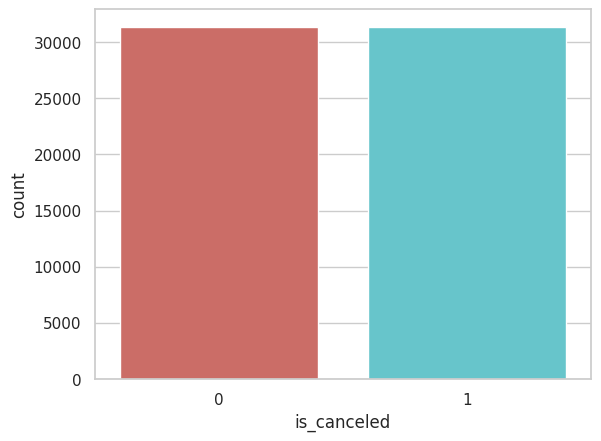

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(y_resampled)
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size)

In [ ]:
print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Train dataset size: {x_test.shape}, {y_test.shape}')

Train dataset size: (50166, 28), (50166,)
Train dataset size: (12542, 28), (12542,)


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f'Train dataset size: {x_train.shape}, {y_train.shape}')
print(f'Train dataset size: {x_test.shape}, {y_pred.shape}')

Train dataset size: (50166, 28), (50166,)
Train dataset size: (12542, 28), (12542,)


In [ ]:
pd.DataFrame(zip(y_test, y_pred))

,0,1
0,1,1
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
12537,0,0
12538,0,1
12539,1,1
12540,0,1


In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Percision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'f1: {f1_score(y_test, y_pred)}')

Accuracy: 0.7001275713602296
Percision: 0.7026808785529716
Recall: 0.6938287354488917
f1: 0.6982267511835032


In [ ]:
y_test.shape

(12542,)

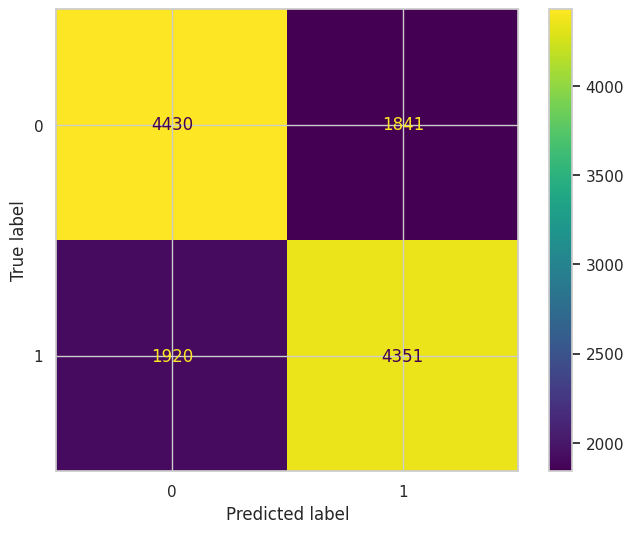

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)

display.plot(ax=ax)

# Обучим модель на всех данных


In [ ]:
y = train['is_canceled']
x = train.drop(['is_canceled'], axis=1)

In [ ]:
ros = RandomOverSampler()

# Применение увеличения выборки к данным
x_resampled, y_resampled = ros.fit_resample(x, y)

In [ ]:
model = LogisticRegression()
#model.fit(x, y)
model.fit(x_resampled, y_resampled)
y_pred = model.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Применим модель


In [ ]:
test_1 = test.copy()
for i in filter_not_str(test):
    test.loc[:, i] = labelencoder.fit_transform(test.loc[:, i])

In [ ]:
y_test = model.predict(test)
y_test

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
df = test_1.join(pd.Series(y_test, name='is_canceled'))

In [ ]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,is_canceled
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12,0
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31,1
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29,1
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29,0
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14,1


In [ ]:
#df['is_canceled'].to_csv('predict.csv')